# Analyse descriptive des données pour cibler les points de correction  

In [34]:
############################################################
import pandas as pd                                        
import numpy as np
from math import isnan
import sys
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, clear_output 
import ipywidgets as widgets
from sklearn.preprocessing import LabelEncoder
import random
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import progressbar 
import time
#pip install ipywidgets==7.5.1
import seaborn as sns
%matplotlib inline
############################################################
name_file='Dataset_9_cost.csv'

def df_create(name=""):
    try:
        df=pd.read_csv(name,sep='|')
        #@variable_global : 
        global nb_Columns 
        global nb_Lines 
        global list_Unnamed 
        global list_Named 
        
        nb_Columns=df.shape[1] #nombre de colonnes du df "nb_Columns=16"
        nb_Lines=df.shape[0] #nombre de lignes du df "nb_lines=1338"
        list_Unnamed=df.columns[0:9].tolist()#liste des colonnes d'index 0 à 9 "les colonnes commençant par Unnamed"
        list_Named=df.columns[9:nb_Columns].tolist()#liste des colonnes d'index 9 à 16 "les colonnes ne commançant pas par Unnamed"
    except:
        print('Fichier inconnu') #erreur retourner si la lecture du df est erroné
    return df
#########################EXECUTION###################################
data_frame=df_create(name_file)
data_frame

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0,0,0,Allez au boulot ! :),female,None,0,yes,southwest,16884.92400
1,1,1,1,1,1,1,1,1,1,18,male,33.77,1,no,southeast,1725.55230
2,2,2,2,2,2,2,2,2,2,28,male,33.0,3,no,southeast,4449.46200
3,3,3,3,3,3,3,3,3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,4,4,4,4,4,4,4,4,32,male,28.88,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1333,1333,1333,1333,1333,1333,1333,1333,1333,50,male,30.97,3,no,northwest,10600.54830
1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,18,Allez au boulot ! :),31.92,0,no,northeast,2205.98080
1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,18,female,36.85,0,no,southeast,1629.83350
1336,1336,1336,1336,1336,1336,1336,1336,1336,1336,21,female,25.8,0,no,southwest,2007.94500


In [35]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1338 non-null   int64  
 1   Unnamed: 0.1                1338 non-null   int64  
 2   Unnamed: 0.1.1              1338 non-null   int64  
 3   Unnamed: 0.1.1.1            1338 non-null   int64  
 4   Unnamed: 0.1.1.1.1          1338 non-null   int64  
 5   Unnamed: 0.1.1.1.1.1        1338 non-null   object 
 6   Unnamed: 0.1.1.1.1.1.1      1338 non-null   object 
 7   Unnamed: 0.1.1.1.1.1.1.1    1338 non-null   object 
 8   Unnamed: 0.1.1.1.1.1.1.1.1  1338 non-null   object 
 9   age                         1338 non-null   object 
 10  sex                         1324 non-null   object 
 11  bmi                         1325 non-null   object 
 12  children                    1338 non-null   int64  
 13  smoker                      1338 

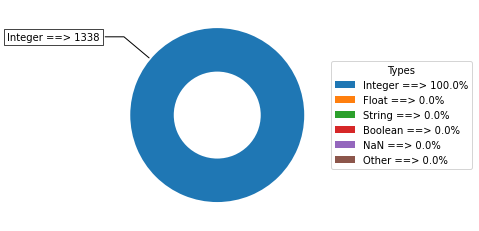

['La colonne [Unnamed: 0] est une colonne inconnu', 'Elle est composé de:', '-1338 Integer soit 100.0% des types de variable']


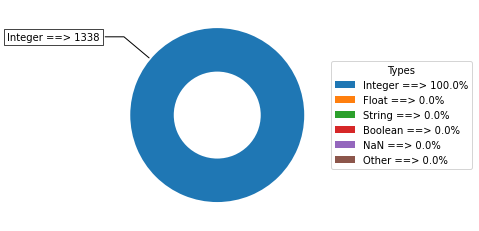

['La colonne [Unnamed: 0.1] est une colonne inconnu', 'Elle est composé de:', '-1338 Integer soit 100.0% des types de variable']


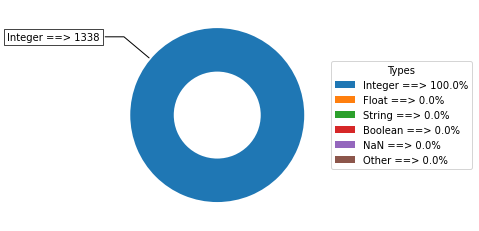

['La colonne [Unnamed: 0.1.1] est une colonne inconnu', 'Elle est composé de:', '-1338 Integer soit 100.0% des types de variable']


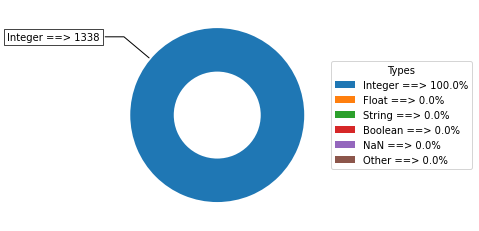

['La colonne [Unnamed: 0.1.1.1] est une colonne inconnu', 'Elle est composé de:', '-1338 Integer soit 100.0% des types de variable']


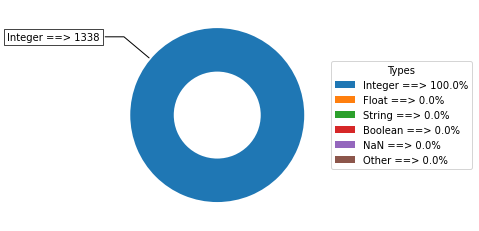

['La colonne [Unnamed: 0.1.1.1.1] est une colonne inconnu', 'Elle est composé de:', '-1338 Integer soit 100.0% des types de variable']


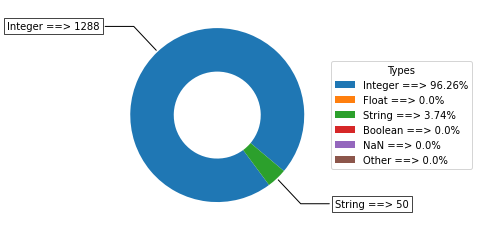

['La colonne [Unnamed: 0.1.1.1.1.1] est une colonne inconnu', 'Elle est composé de:', '-1288 Integer soit 96.26% des types de variable', '-50 String soit 3.74% des types de variable']


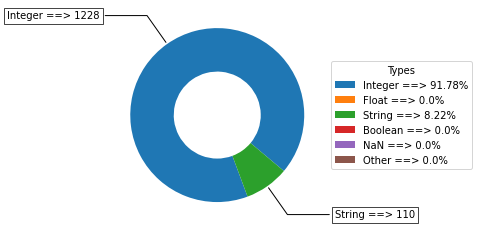

['La colonne [Unnamed: 0.1.1.1.1.1.1] est une colonne inconnu', 'Elle est composé de:', '-1228 Integer soit 91.78% des types de variable', '-110 String soit 8.22% des types de variable']


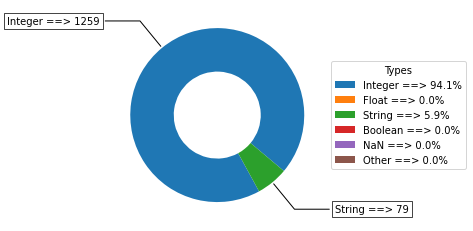

['La colonne [Unnamed: 0.1.1.1.1.1.1.1] est une colonne inconnu', 'Elle est composé de:', '-1259 Integer soit 94.1% des types de variable', '-79 String soit 5.9% des types de variable']


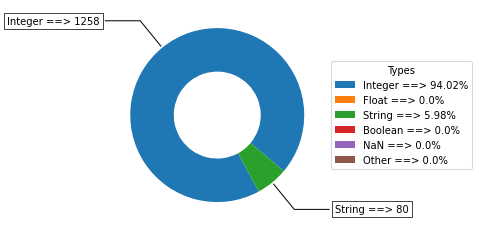

['La colonne [Unnamed: 0.1.1.1.1.1.1.1.1] est une colonne inconnu', 'Elle est composé de:', '-1258 Integer soit 94.02% des types de variable', '-80 String soit 5.98% des types de variable']


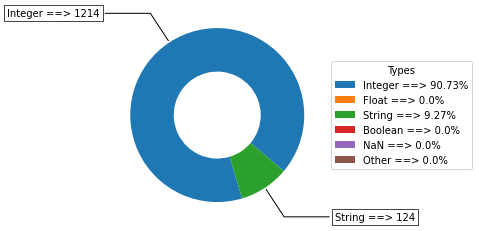

['La colonne [age] est une colonne principale', 'Elle est composé de:', '-1214 Integer soit 90.73% des types de variable', '-124 String soit 9.27% des types de variable']


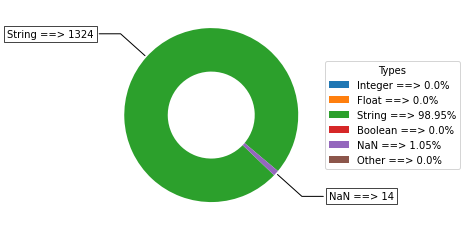

['La colonne [sex] est une colonne principale', 'Elle est composé de:', '-1324 String soit 98.95% des types de variable', '-14 NaN soit 1.05% des types de variable']


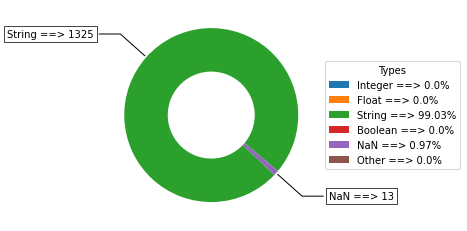

['La colonne [bmi] est une colonne principale', 'Elle est composé de:', '-1325 String soit 99.03% des types de variable', '-13 NaN soit 0.97% des types de variable']


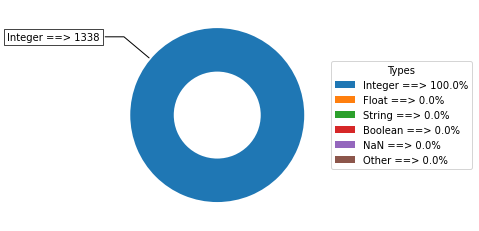

['La colonne [children] est une colonne principale', 'Elle est composé de:', '-1338 Integer soit 100.0% des types de variable']


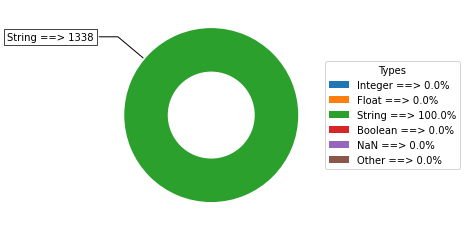

['La colonne [smoker] est une colonne principale', 'Elle est composé de:', '-1338 String soit 100.0% des types de variable']


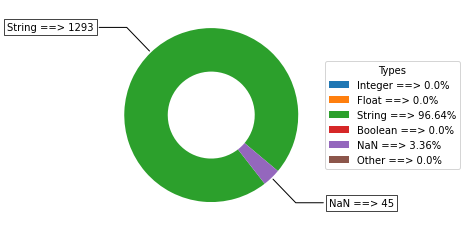

['La colonne [region] est une colonne principale', 'Elle est composé de:', '-1293 String soit 96.64% des types de variable', '-45 NaN soit 3.36% des types de variable']


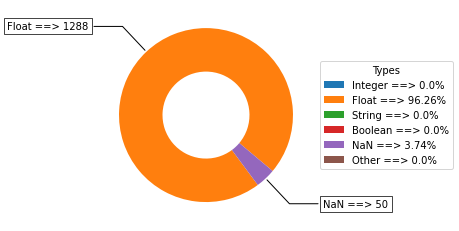

['La colonne [charges] est une colonne principale', 'Elle est composé de:', '-1288 Float soit 96.26% des types de variable', '-50 NaN soit 3.74% des types de variable']


In [36]:
def analyse_type_variable(df):#Analyse et calcule de pourcentage type de varibaible"Null,String,Integer,Float,Other"
    dic={}
    try:
        for col_name in df.columns:
            nb_integer,nb_float,nb_string,nb_boolean,nb_null,nb_other=0,0,0,0,0,0
            
            for val in df[col_name]:
                try:     
                    if type(float(val))==float:
                        try:
                            if len(str(int(val)))==len(str(val)):
                                nb_integer +=1
                            else:
                                nb_float +=1
                        except:
                            if isnan(val):
                                nb_null+=1
                            else:
                                nb_float +=1
                    elif isnan(val):
                        nb_null+=1
                except:
                    try:
                        if type(val)==str:
                            nb_string+=1
                    except:
                        nb_other+=1
            dic.update({col_name:{'Integer':{'nb':nb_integer,'percentage':(nb_integer/nb_Lines)*100}}})
            dic[col_name].update({'Float':{'nb':nb_float,'percentage':(nb_float/nb_Lines)*100}})
            dic[col_name].update({'String':{'nb':nb_string,'percentage':(nb_string/nb_Lines)*100}})
            dic[col_name].update({'Boolean':{'nb':nb_boolean,'percentage':(nb_boolean/nb_Lines)*100}})
            dic[col_name].update({'NaN':{'nb':nb_null,'percentage':(nb_null/nb_Lines)*100}})
            dic[col_name].update({'Other':{'nb':nb_other,'percentage':(nb_other/nb_Lines)*100}})

    except:
        print('[Data] incorrect (function analyse_type_variable)')
    
    return dic

############################################################################################
def splot_donuts(dic):  #Diagramme à secteurs avec une zone du centre découpé 
    ig, ax = plt.subplots(figsize=(19, 4), subplot_kw=dict(aspect="equal"))

    list_types,list_percentage,nb_types,list_nb=[],[],[],[]
    
    for key,val in dic.items():
        list_percentage.append(val['percentage'])
        list_types.append(key+" ==> "+str(round(val['percentage'],2))+"%")
        nb_types.append(key+" ==> "+str(val['nb']))
        list_nb.append(int(val['nb']))
        
    wedges, texts = ax.pie(list_percentage, wedgeprops=dict(width=0.5), startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, 
              zorder=0, va="center")
    
    ax.legend(wedges, list_types,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        
        if i < len(nb_types):
            if list_nb[i]>0:
                ax.annotate(nb_types[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, **kw)
    plt.show()
#############################################################################################
def description_col(col_name,dic_col):
    desc_col=[]
    if col_name in list_Unnamed:
        desc_col.append("La colonne ["+str(col_name)+"] est une colonne inconnu")
        desc_col.append("Elle est composé de:")
        for key,val in dic_col[col_name].items():
            if val['nb']!=0:
                desc_col.append("-"+str(val['nb'])+" "+str(key)+" soit "+str(round(val['percentage'],2))+"% des types de variable")
    elif col_name in list_Named:
        desc_col.append("La colonne ["+str(col_name)+"] est une colonne principale")
        desc_col.append("Elle est composé de:")
        for key,val in dic_col[col_name].items():
            if val['nb']!=0:
                desc_col.append("-"+str(val['nb'])+" "+str(key)+" soit "+str(round(val['percentage'],2))+"% des types de variable")
                    
    return desc_col


#########################EXECUTION###################################
for col in data_frame.columns:
    splot_donuts(analyse_type_variable(data_frame)[col])
    print(description_col(col,analyse_type_variable(data_frame)))

# Supprimer les doublons 

In [37]:
print('Nombre de ligne initiale=',nb_Lines)
data_frame = data_frame.drop_duplicates()
print('Nombre de ligne apres recherche doublons=',data_frame.shape[0])


Nombre de ligne initiale= 1338
Nombre de ligne apres recherche doublons= 1338


# Supprimer ou remplacer les valeurs incohérentes (NaN, None, etc..) 

In [38]:
print(data_frame['sex'].unique())
print(data_frame['smoker'].unique())
print(data_frame['region'].unique())
print(data_frame['children'].unique())

['female' 'male' 'Allez au boulot ! :)' 'courage!!!' 'hello' nan]
['yes' 'no' 'None' 'ù*ùfsfsf///']
['southwest' 'southeast' 'northwest' nan 'None' 'northeast' 'hello']
[   0    1    3    2    5    4 -400]


In [39]:
#############################################################################################
list_sex=['male','female']
list_smoker=['yes','no']
list_region=['southwest','southeast','northwest','northeast']
list_children=['0','1','2','3','4','5']
#############################################################################################
def filter_1(df,lst,colname):#filtrage des string non appartenant au liste ci dessus
    for i in range(nb_Lines):
        try:
            if str(df[colname][i]) not in lst :
                df[colname][i]=np.nan     
        except:
            print('Erreur Colonne:'+colname+' Indice:'+i+' Valeur:'+str(df[colname][i])+' (function filter_1)')
    return df
########################################################################################################
def filter_2(df="",col_name=""):#filtrage des float et int 
    if(col_name!=""):
        try:
            for i in range(nb_Lines):
                
                try:
                    float(df[col_name][i])
                    if col_name=="age":
                        if float(df[col_name][i])<=0 or float(df[col_name][i]) > 140:
                            df[col_name][i]=np.nan
                    else:
                        if float(df[col_name][i])<=0 :
                            df[col_name][i]=np.nan
                except:
                    df[col_name][i]=np.nan
        except:
            print("[Data] ou [Colonne] incorrecte (function filter_2)")
    else: 
        print("Vous devez entrer [Data] et [Colonne] (function filter_2)")
    return df

#########################EXECUTION###################################
filter_1(data_frame, list_sex,"sex")
filter_1(data_frame, list_smoker,"smoker")
filter_1(data_frame, list_region,"region")
filter_1(data_frame, list_children,"children")
            
filter_2(data_frame,"age")
filter_2(data_frame,"bmi")
filter_2(data_frame,"charges")

data_frame.head(6)

<ipython-input-39-c35f6cabb710>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname][i]=np.nan
/Users/romanwawrzynowicz/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-39-c35f6cabb710>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][i]=np.nan
<ipython-input-39-c35f6cabb710>:25: SettingWi

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1.1,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0,0,0,NaN,female,NaN,0.0,yes,southwest,16884.92400
1,1,1,1,1,1,1,1,1,1,18,male,33.77,1.0,no,southeast,1725.55230
2,2,2,2,2,2,2,2,2,2,28,male,33.0,3.0,no,southeast,4449.46200
3,3,3,3,3,3,3,3,3,3,33,male,22.705,0.0,no,northwest,21984.47061
4,4,4,4,4,4,4,4,4,4,32,male,28.88,0.0,no,northwest,3866.85520
5,5,5,5,5,5,5,5,5,5,31,female,25.74,0.0,NaN,NaN,3756.62160


# Numériser l'ensemble des colonnes de manière pertinentes 

In [40]:
def nan_to_value(df="",col_name="",type_col=""):  #Transformation des nan en la moyenne de la colonne
    try:
        med=df[col_name][df[col_name].notnull()].astype(type_col).mean()
        for i in range(nb_Lines):
            try:
                if isnan(df[col_name][i]):
                    df[col_name][i]=round(med,1)
            except:
                df[col_name][i]=round(float(df[col_name][i]),3)
    except:
            print("[Data] ou [Colonne] incorrecte")
    df[col_name] = df[col_name].astype(type_col)
#########################EXECUTION###################################
age_nan=data_frame.isnull()['age']
bmi_nan=data_frame.isnull()['bmi']
charges_nan=data_frame.isnull()['charges']

print("########################### Clonne [age] avant ###########################")
print(data_frame['age'][age_nan])
print("########################### Clonne [age] apres ###########################")
nan_to_value(data_frame,'age','int64')
print(data_frame['age'][age_nan])

print("########################### Clonne [bmi] avant ###########################")
print(data_frame['bmi'][bmi_nan])
print("########################### Clonne [bmi] apres ###########################")
nan_to_value(data_frame,'bmi','float64')
print(data_frame['bmi'][bmi_nan])

print("########################### Clonne [charges] avant ###########################")
print(data_frame['charges'][charges_nan])
print("########################### Clonne [charges] apres ###########################")
nan_to_value(data_frame,'charges','float64')
print(data_frame['charges'][charges_nan])





########################### Clonne [age] avant ###########################
0       NaN
15      NaN
16      NaN
18      NaN
36      NaN
       ... 
1304    NaN
1305    NaN
1312    NaN
1320    NaN
1327    NaN
Name: age, Length: 154, dtype: object
########################### Clonne [age] apres ###########################


<ipython-input-40-8bc694041a13>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][i]=round(med,1)
<ipython-input-40-8bc694041a13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][i]=round(float(df[col_name][i]),3)


0       39
15      39
16      39
18      39
36      39
        ..
1304    39
1305    39
1312    39
1320    39
1327    39
Name: age, Length: 154, dtype: int64
########################### Clonne [bmi] avant ###########################
0       NaN
11      NaN
21      NaN
30      NaN
40      NaN
       ... 
1299    NaN
1304    NaN
1312    NaN
1319    NaN
1331    NaN
Name: bmi, Length: 170, dtype: object
########################### Clonne [bmi] apres ###########################
0       30.7
11      30.7
21      30.7
30      30.7
40      30.7
        ... 
1299    30.7
1304    30.7
1312    30.7
1319    30.7
1331    30.7
Name: bmi, Length: 170, dtype: float64
########################### Clonne [charges] avant ###########################
68     NaN
140    NaN
179    NaN
196    NaN
237    NaN
361    NaN
366    NaN
377    NaN
388    NaN
399    NaN
404    NaN
445    NaN
514    NaN
543    NaN
569    NaN
575    NaN
612    NaN
631    NaN
632    NaN
653    NaN
688    NaN
722    NaN
742    NaN
777    N

# Supprimer les colonnes inutiles 

In [41]:
data_frame = data_frame.drop(columns=list_Unnamed)
data_frame

,age,sex,bmi,children,smoker,region,charges
0,39,female,30.700,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,NaN,no,northwest,10600.54830
1334,18,NaN,31.920,NaN,no,northeast,2205.98080
1335,18,female,36.850,NaN,no,southeast,1629.83350
1336,21,female,25.800,NaN,no,southwest,2007.94500


# Reformater les données de manière pertinente 

In [42]:
sex=LabelEncoder()  #Encodez les étiquettes cibles avec une valeur comprise entre 0 et n_classes-1. Ce transformateur est utilisé pour coder les valeurs cibles, c'est-à-dire y, et non l'entrée X.
data_frame['sex']=sex.fit_transform(data_frame['sex'].astype(str))

region=LabelEncoder()
data_frame['region']=region.fit_transform(data_frame['region'].astype(str))

smoker=LabelEncoder()
data_frame['smoker']=smoker.fit_transform(data_frame['smoker'].astype(str))

children=LabelEncoder()
data_frame['children']=children.fit_transform(data_frame['children'].astype(str))
data_frame

,age,sex,bmi,children,smoker,region,charges
0,39,0,30.700,0,2,4,16884.92400
1,18,1,33.770,1,1,3,1725.55230
2,28,1,33.000,3,1,3,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,6,1,2,10600.54830
1334,18,2,31.920,6,1,1,2205.98080
1335,18,0,36.850,6,1,3,1629.83350
1336,21,0,25.800,6,1,4,2007.94500


# Prediction

### Correlation

AxesSubplot(0.125,0.125;0.62x0.755)


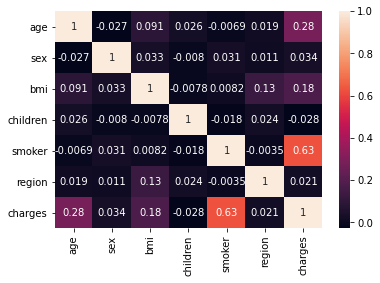

In [43]:
print(sns.heatmap(data_frame.corr(), annot = True))

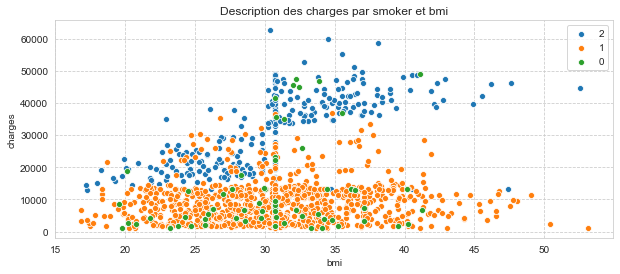

In [44]:
#Un nuage de points (également appelé nuage de points, nuage de points) utilise des points pour représenter les valeurs de deux variables numériques différentes. 
#La position de chaque point sur l'axe horizontal et vertical indique les valeurs pour un point de données individuel. 
#Les nuages de points sont utilisés pour observer les relations entre les variables
def scatterplot_description(df,col_name1,col_name2):
    sns.set_style("whitegrid", {'grid.linestyle': '--'})
    plt.figure(figsize = (10,4))
    colonne=df[col_name1].unique()
    plt.title("Description des charges"+" par "+ col_name1 +" et "+ col_name2)
    for i, colonne in enumerate(colonne):
        temp = df[df[col_name1] == colonne]
        sns.scatterplot(temp[col_name2],temp["charges"])
    plt.legend(df[col_name1].unique())

scatterplot_description(data_frame,"smoker","bmi")

In [45]:
data_frame

,age,sex,bmi,children,smoker,region,charges
0,39,0,30.700,0,2,4,16884.92400
1,18,1,33.770,1,1,3,1725.55230
2,28,1,33.000,3,1,3,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,6,1,2,10600.54830
1334,18,2,31.920,6,1,1,2205.98080
1335,18,0,36.850,6,1,3,1629.83350
1336,21,0,25.800,6,1,4,2007.94500


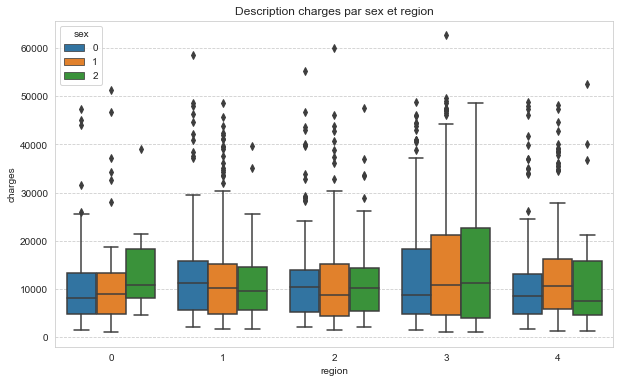

In [46]:
#Vous avez besoin d'informations sur la variabilité ou la dispersion des données. 
#Un boxplot est un graphique qui vous donne une bonne indication de la répartition des valeurs des données. 
#Bien que les boîtes à moustaches puissent sembler primitives par rapport à un histogramme ou à un graphique de densité.
#ils ont l'avantage de prendre moins d'espace, ce qui est utile pour comparer les distributions entre de nombreux groupes ou ensembles de données.
def boxplot_description(df,col_name1,col_name2):
    plt.figure(figsize = (10,6))
    plt.title("Description charges"+" par "+ col_name1 +" et "+ col_name2)
    sns.boxplot(x = col_name2, y = "charges", hue = col_name1, data = df)
    
boxplot_description(data_frame,"sex","region")

In [47]:
X = np.array(data_frame.drop(['charges'],1))
y = data_frame['charges']
#Elaboration d'un arbre décisionnel, les données sont sous forme matriciel
def random_tree(df):
    X_trainC , X_testC,y_trainC , y_testC =train_test_split(X,y,test_size=0.2)
    clf = tree.DecisionTreeRegressor()
    clf.fit(X_trainC,y_trainC)
    charges_accuracy_tree=clf.score(X_testC,y_testC)
    print(clf.predict(X_testC))
    print('charges accuracy score using Tree regression: ',charges_accuracy_tree*100)
random_tree(data_frame)

[ 2117.33885     5138.2567     12105.32       26109.32905
  4564.19145    13143.33665     1632.03625    12347.172
  6455.86265    24513.09126     2585.85065     4237.12655
  9583.8933      2352.96845    16115.3045     10197.7722
  4500.33925     5425.02335     2104.1134     21797.0004
 10436.096       1826.843      11837.16       11090.7178
  1639.5631      8068.185      13217.0945      3561.8889
  3766.8838     11554.2236     13224.693       6640.54485
  6781.3542     11552.904       1744.465      24671.66334
 13457.9608      9875.6804     19496.71917     3393.35635
 41949.2441     47403.88       42111.6647     22144.032
  2483.736      11938.25595    28923.13692     3176.2877
 34838.873      37484.4493      2045.68525     6196.448
  6686.4313      2150.469       9304.7019      8551.347
  1632.03625     5966.8874     10928.849      12333.828
 40419.0191      1877.9294     19040.876      12981.3457
 13258.9         1625.43375    35069.37452     5846.9176
 14256.1928     36219.40545    

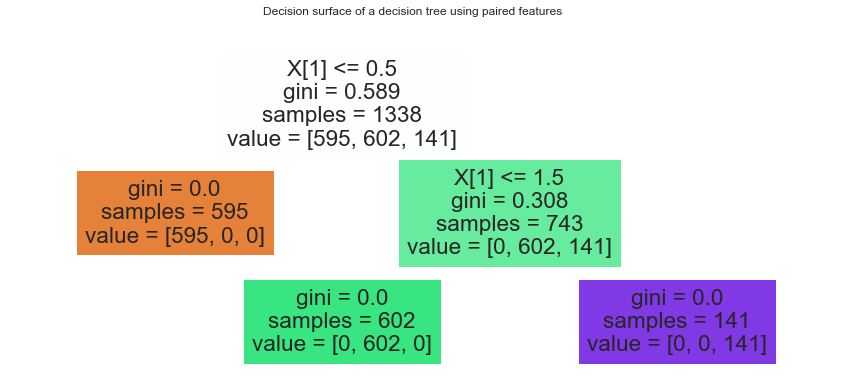

In [48]:
#Elaboration du schéma de l'arbre décisionnel
def decision_tree(df,col_name):
    X = np.array(data_frame.drop(['charges'],1))
    try:
        clf = DecisionTreeClassifier().fit(np.array(data_frame.drop(['charges'],1)), data_frame[col_name])
        plt.figure(figsize = (15,6))
        plt.suptitle("Decision surface of a decision tree using paired features")
        plot_tree(clf, filled=True)
        plt.show()
    except:
        print('L\'arbre de décision ne peut pas se faire sur la colonne ['+col_name+']')
#########################EXECUTION###################################    
decision_tree(data_frame,"sex")